#  01 PyTorch workflow

In [1]:
what_we_are_covering = {1: 'data (prepare and load)',
                        2: 'build model',
                        3: 'fitting the model to data (training)',
                        4: 'making predictions and evaluating model (inference)',
                        5: 'saving and loading a model',
                        6: 'putting it all together'}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

https://docs.pytorch.org/docs/stable/nn.html

In [2]:
import torch
from torch import nn # contains all of pytorches building blocks
import matplotlib.pyplot as plt

# ckeck pytorch version
torch.__version__

'2.0.0'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning as a game of two parts

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

creating data using the linear regression formula

using a linear regression formula to make a straight line with known parameters

In [3]:
# create known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### splitting data into training and test sets, validation set is not always used (important concept in machine learning)

generalisation -> the ability for a machine learning model to perform well on data it has not seen before

In [5]:
# create train - test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing data

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [6]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots traing data, test data, and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
      plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

      plt.legend(prop={"size": 14});

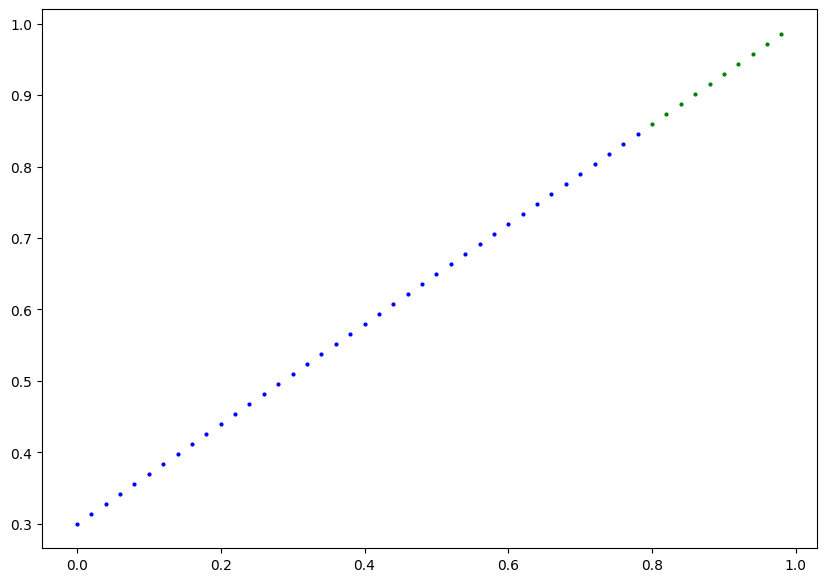

In [7]:
plot_prediction();

## 2. Building pytorch model

https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

- start with random values (weight, bias)

- look at training data and adjust the random values to better represent the ideal values (weight and bias that were used to create the model)

main algorithms -> 1. gradient descent 2. backpropagation

In [8]:
import torch
from torch import nn
# create a linear regression model class
class LinearRegressionModel(nn.Module): # inheriting from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # start with a random bas and try to adjust it to the ideal bias
                                         requires_grad=True,
                                         dtype=torch.float))

  # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # formula for the linear regression

https://machinelearningmastery.com/implementing-gradient-descent-in-pytorch/

https://medium.com/@noel.benji/breaking-down-backpropagation-in-pytorch-3762ea107d3a

https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

https://docs.pytorch.org/tutorials/beginner/basics/intro.html


### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs

* torch.nn.Parameter - what parameters the model should try and learn

* torch.nn.Module - The base class for all neural network modules, if subclassed forward() sholud be overwritten (like in the example above)

* torch.optin - for optimizers in pytorch, will help with gradient descent

* def forward() - all nn.Module subclasses require to overwrite forward

libraries for main steps
1. Get data ready -> torchvision.transforms, torch.utils.data.Dataset,
  torch.utils.data.DataLoader

2.

In [9]:
libraries = {
    'getting_data_ready': ['torchvision.transforms', 'torch.utils.data.Dataset', 'torch.utils.data.DataLoader'],
    'pre_trained_models': ['torch.nn', 'torch.nn.Module', 'torchvision.models', 'torch.optim'],
    'fit_model_to_data_predicting': [],
    'evaluation': ['torchmetrics'],
    'improving': ['torch.utils.tensorboard'],
    'save_and_reload': []
}

libraries

{'getting_data_ready': ['torchvision.transforms',
  'torch.utils.data.Dataset',
  'torch.utils.data.DataLoader'],
 'pre_trained_models': ['torch.nn',
  'torch.nn.Module',
  'torchvision.models',
  'torch.optim'],
 'fit_model_to_data_predicting': [],
 'evaluation': ['torchmetrics'],
 'improving': ['torch.utils.tensorboard'],
 'save_and_reload': []}

In [10]:
# create a random seed
torch.manual_seed(42)

# create instance (subclass od nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## through training the weight and bias values should be as close to the ones that were originally defined

In [12]:
weight, bias

(0.7, 0.3)

### making predictions using torch.inference_mode()

checking the model for how well it predicts y_test and x_test

data will be run throught the forward() method

In [13]:
X_test, y_test # optimal model will take in X_test values and predict exactly the y_test values

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

https://docs.pytorch.org/docs/stable/generated/torch.autograd.grad_mode.inference_mode.html

In [15]:
# make predictions with model
with torch.inference_mode(): # turns off gradient tracking, lacking the grad function, makes the code faster at this point
  y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
with torch.no_grad(): # using the no_grad functions instead of inference ... according to twitter conversation inference is preferred
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

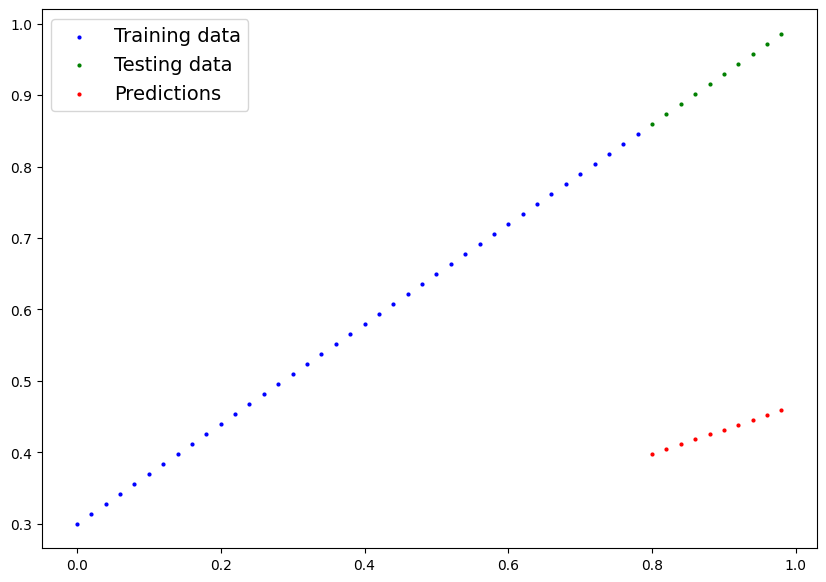

In [18]:
plot_prediction(predictions=y_preds)

## idea of training for a model to move from unknown parameters to known parameters

## from a poor representation of the data to good representation

## measure how the predictions of model is to use a loss function

- loss function may also be called cost function or criterion in other cases

- **Loss function:** a function to measure how wrong the models predictions are compared to the ideal output

- **optimizer:** takes into account the loss of a model and adjusts the parameters (e.g. weight, bias) to improve the loss function

- for pytorch a **training loop** and a **testing loop** is needed

https://docs.pytorch.org/docs/stable/nn.html#loss-functions


In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

https://docs.pytorch.org/docs/stable/optim.html

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
# setup for a loss function
loss_fn = nn.L1Loss()

# setup for optimizer -> stochastic gradient descent
optimizer = torch.optim.SGD(params=model_0.parameters(), # params are the parameters which want to be optimized
                            lr=0.01)  # lesarning rate important hyper parameter set by yourself,
                                      # the smaller the learning rate the smaller the change in the parameter
                                      # -> 0.01 changes to 2nd decimal position of the input value
                                      # and the other way around


### building a training loop and a testing loop in pytorch

0. loop through the data multiple times
1. forward pass (involves date moving through forward function) to mak epredictions on data - also called forward propagation
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - moves backwards through the network to calculate the gradients of each parameter with respect to the loss (**backpropagation**)
5. optimizer step - use the optimizer to adjust model parameters to try and improve the loss (**gradient descent**)

In [22]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
# an epoch is one loop through the data (epoch is hyper parameter, self set)
epochs = 200

# track difference values
epoch_count = []
loss_values = []
test_loss_values = []

### training
# 0. looping
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # sets all parameters that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero graph
  optimizer.zero_grad() # starts each loop iteration fresh

  # 4. perform back propagation on the loss with respect to model parameters
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # also different settings which are not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking
  #with torch.no_grad(): # also valid but more widley used in older code
    # 1. do the forward pass
    test_pred = model_0(X_test)

    # 2. calculate te loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} / Loss: {loss} / Test Loss: {test_loss}")

Epoch: 0 / Loss: 0.31288138031959534 / Test Loss: 0.48106518387794495
Epoch: 10 / Loss: 0.1976713240146637 / Test Loss: 0.3463551998138428
Epoch: 20 / Loss: 0.08908725529909134 / Test Loss: 0.21729660034179688
Epoch: 30 / Loss: 0.053148526698350906 / Test Loss: 0.14464017748832703
Epoch: 40 / Loss: 0.04543796554207802 / Test Loss: 0.11360953003168106
Epoch: 50 / Loss: 0.04167863354086876 / Test Loss: 0.09919948130846024
Epoch: 60 / Loss: 0.03818932920694351 / Test Loss: 0.08886633068323135
Epoch: 70 / Loss: 0.03476089984178543 / Test Loss: 0.0805937647819519
Epoch: 80 / Loss: 0.03132382780313492 / Test Loss: 0.07232122868299484
Epoch: 90 / Loss: 0.02788739837706089 / Test Loss: 0.06473556160926819
Epoch: 100 / Loss: 0.024458957836031914 / Test Loss: 0.05646304413676262
Epoch: 110 / Loss: 0.021020207554101944 / Test Loss: 0.04819049686193466
Epoch: 120 / Loss: 0.01758546568453312 / Test Loss: 0.04060482233762741
Epoch: 130 / Loss: 0.014155393466353416 / Test Loss: 0.03233227878808975
Ep

1. created empty lists for storing values of importance
2. model.eval() let the model know what we want to do, hence evaluate -> turns off functionality which is not needed
3. activate torch.inference_mode() to disable functionality such as gradient tracking, use inference mode makes the model evaluate faster
4. passing the test data through the model -> will call the implemented forward method
5. calculate the loss value, how wrong the models predictions on the test dataset
6. display information outputs per number of epochs, can be customized depending on the number of epochs being run

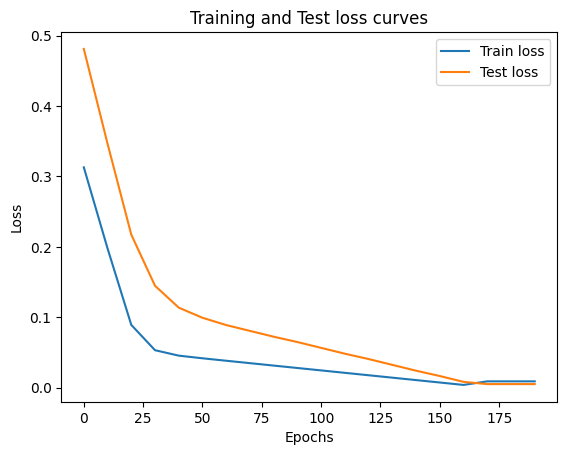

In [24]:
import numpy as np
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

Function: pass the data through a model for a number of epochs

1. pass the data through the model, performed by the forward() method, refere to LinearReggresionModel

2. calculate the loss value (how worng the models predictions are)

3. zero the optimizer gradients (they accumulate every epoch, zero them to start fresh each forward pass)

4. perform backpropagation on the loss function (compute the gradient of every parameter with ... requires_grad=True)

5. step the optimizer to update the models parameters with respect to the gradients calculated by looss.backward()

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
weight, bias

(0.7, 0.3)

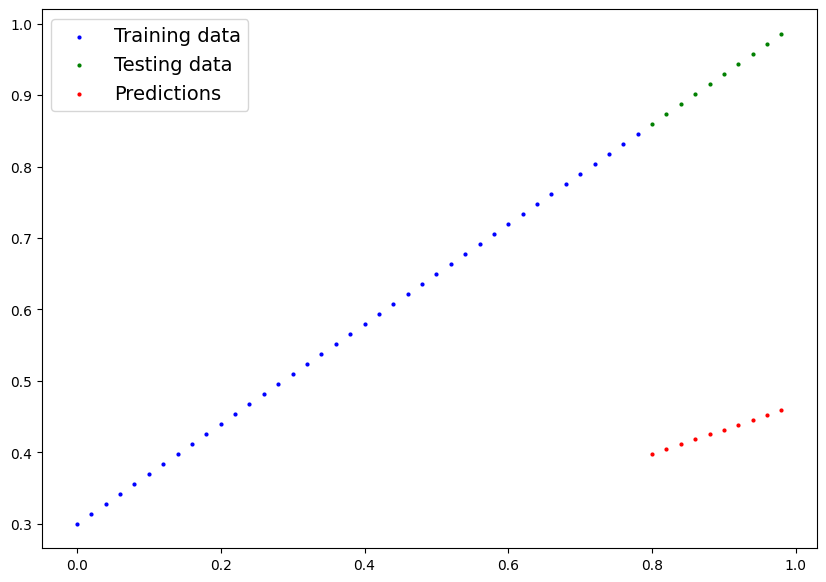

In [28]:
plot_prediction(predictions=y_preds)

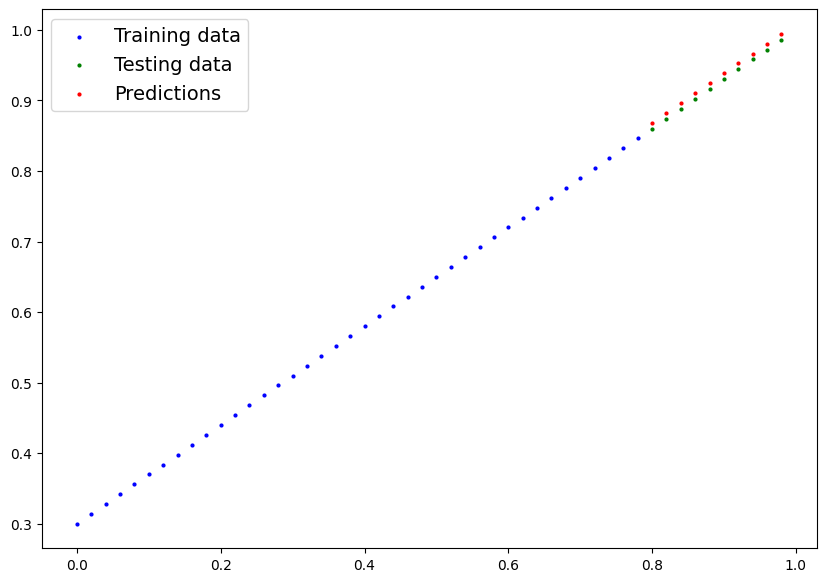

In [29]:
plot_prediction(predictions=y_preds_new)

# saving a model in PyTorch

3 methods to know for saving and oading models in PyTorch

1. torch.save() - allows saving pytorch object in python pickle format
2. torch.load() - allows loading a saved pytorch object
3. torch.nn.Module.load_state_dict() - allows to load a models saved state dictionary

https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [30]:
print(model_0.state_dict())
list(model_0.parameters())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [31]:
# saving the pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [32]:
!ls -l models

total 8
-rw-r--r--@ 1 marcelmann  staff  1207 Jul  8 22:46 01_pytorch_workflow_model_0.pth


# loading a pytorch model

In [33]:
torch.manual_seed(42)
# to load in a saved state_dict a new instance of the model class has to be created
loaded_model_0 = LinearRegressionModel()
print(f"state dict values of the model instance before updating with the loaded values: {loaded_model_0.state_dict()}")

# load the saved state_dict of model_0 which will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

state dict values of the model instance before updating with the loaded values: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


<All keys matched successfully>

In [34]:
print(f"state dict values after the load of the updated values: {loaded_model_0.state_dict()}")

state dict values after the load of the updated values: OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [35]:
# make some predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [36]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
# compare loaded model preds with original model predictions

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# recap of the previous steps

In [38]:
# importing libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.0.0'

In [39]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [40]:
# generate data using the linear reggresion formula y = weight * x + height
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y  (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [41]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

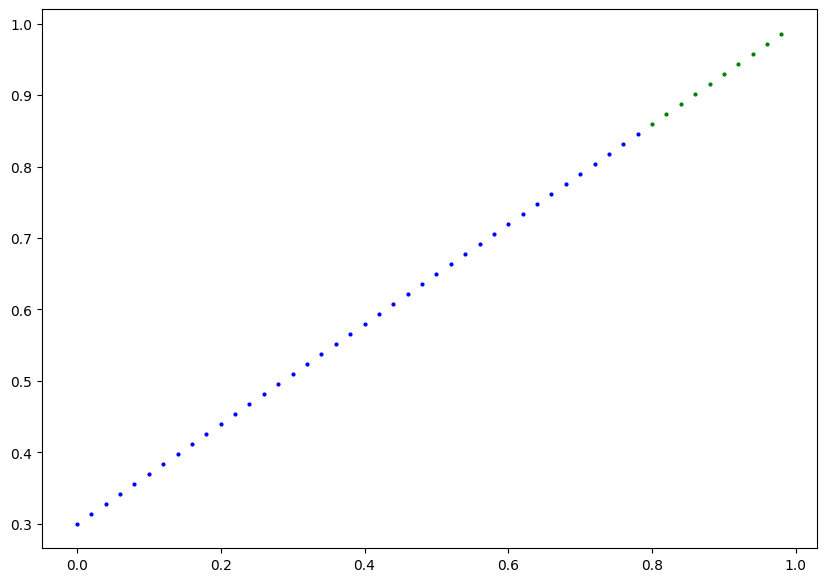

In [42]:
plot_prediction(X_train, y_train, X_test, y_test)

In [43]:
# creating model class
import torch
from torch import nn

class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=float))

    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [44]:
# creating a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [45]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [46]:
# training the model, set the model to use the target device
next(model_1.parameters()).device

device(type='cpu')

In [47]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### training

* loss function -> measures how wrong the model is
* optimizer -> optimizes the models parameters
* training loop
* testing loop

In [48]:
with torch.inference_mode():
  y_preds = model_1(X_test)
print(y_preds)
print(model_1.state_dict())

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


In [49]:
# setup the loss function
loss_fn = nn.L1Loss() # same as MAE

# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [50]:
# training loop

torch.manual_seed(42)

epochs = 200
epoch_count2 = []
loss_values2 = []
test_loss_values2 = []

# device agnostic code for data
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # print out stepwise
    if epoch % 10 == 0:
      epoch_count2.append(epoch)
      loss_values2.append(loss)
      test_loss_values2.append(test_loss)
      print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5739762187004089
epoch: 10 | loss: 0.4399680495262146 | test loss: 0.4392663538455963
epoch: 20 | loss: 0.3247582018375397 | test loss: 0.30455657839775085
epoch: 30 | loss: 0.20954827964305878 | test loss: 0.16984674334526062
epoch: 40 | loss: 0.09433844685554504 | test loss: 0.03513689711689949
epoch: 50 | loss: 0.023886386305093765 | test loss: 0.04784906655550003
epoch: 60 | loss: 0.0199567973613739 | test loss: 0.04580312222242355
epoch: 70 | loss: 0.016517987474799156 | test loss: 0.0375305712223053
epoch: 80 | loss: 0.013089170679450035 | test loss: 0.029944902285933495
epoch: 90 | loss: 0.009653178043663502 | test loss: 0.02167237363755703
epoch: 100 | loss: 0.006215679459273815 | test loss: 0.014086711220443249
epoch: 110 | loss: 0.002787243574857712 | test loss: 0.005814164876937866
epoch: 120 | loss: 0.0012645035749301314 | test loss: 0.013801807537674904
epoch: 130 | loss: 0.0012645035749301314 | test loss: 0.01380180753767

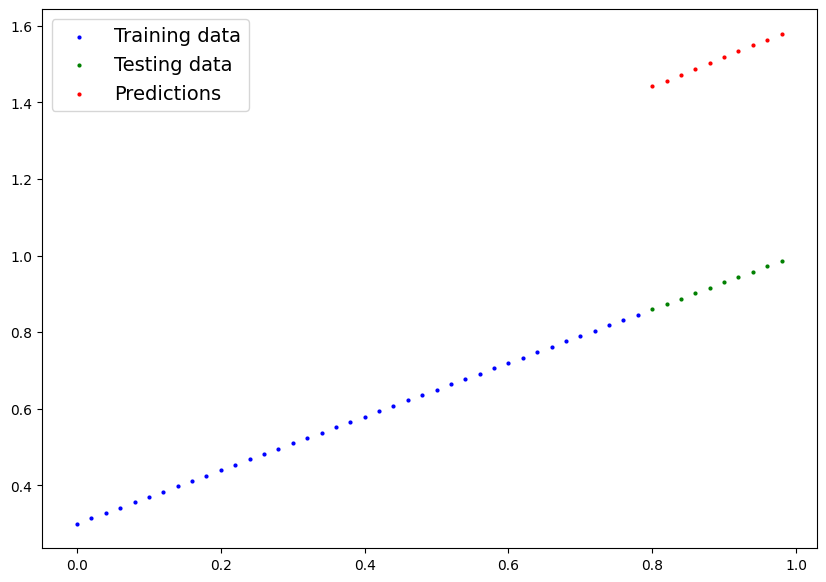

In [51]:
model_1.eval()
with torch.inference_mode():
  y_preds_new = model_1(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

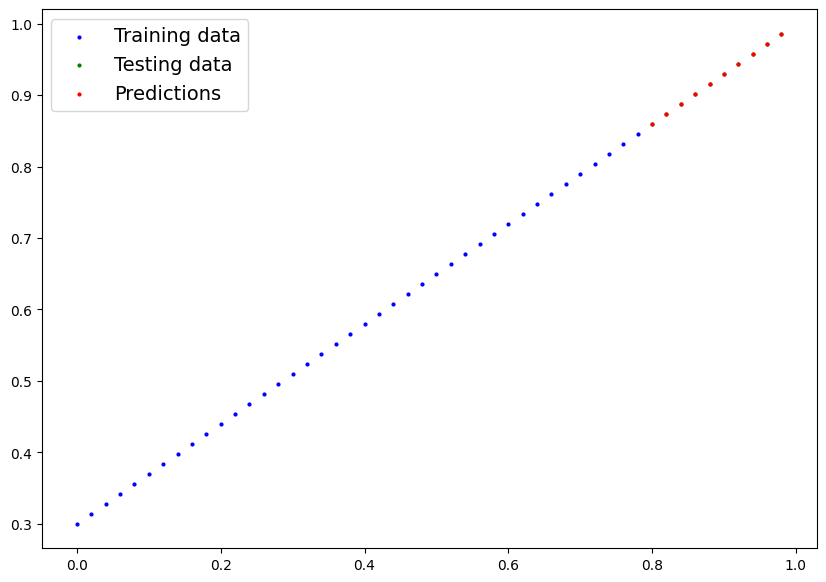

In [52]:
plot_prediction(X_train, y_train, X_test, y_test, y_preds_new)

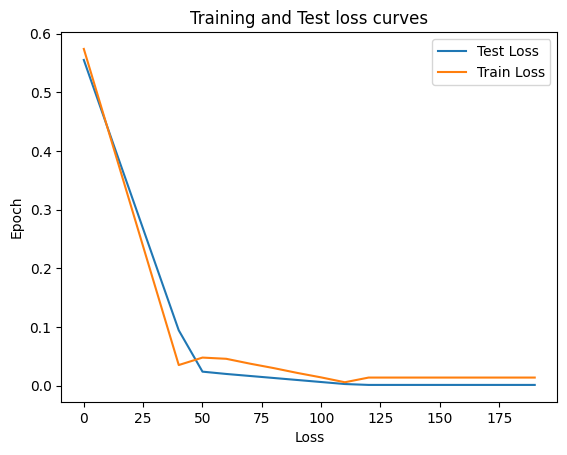

In [53]:
import numpy as np

plt.plot(epoch_count2, np.array(torch.tensor(loss_values2).numpy()), label='Test Loss')
plt.plot(epoch_count2, test_loss_values2, label='Train Loss')
plt.title('Training and Test loss curves')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend();

In [54]:
model_1.state_dict()
print(y_preds_new)

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])


In [55]:
weight, bias

(0.7, 0.3)

in case of type error when doing any sort of plotting data in that regard always keep in mind

***-> when using gpu pay attention, plotting with matplotlib requires numpy and NOT pytorch ... and numpy is cpu based***

In [56]:
from pathlib import Path


#MODEL_PATH = Path('models')
#MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [57]:
!ls -l models

total 16
-rw-r--r--@ 1 marcelmann  staff  1207 Jul  8 22:46 01_pytorch_workflow_model_0.pth
-rw-r--r--@ 1 marcelmann  staff  1271 Jul  8 22:46 01_pytorch_workflow_model_1.pth


In [58]:
#torch.manual_seed(42)

loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [59]:
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [60]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [61]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds_new == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])